# Formular la pregunta

### "Cuál es la probabilidad que un tweet que origina dentro de los coordinados geográficos (-78.31, 0.44, -70.71, 11.39) contiene al menos una ocurrencia de la palabra 'yo' con cualquier composición de acentos y letras minúsculas y mayúsculas."

![](http://mediossociales.es/wp-content/uploads/2012/01/twitter_futbol12.jpg)

# Recopilar datos

In [3]:
import os

import tweepy
from tweepy import Stream

from stream_listener import FiniteStreamListener


### Cargar credenciales

In [4]:
CONSUMER_KEY = "5Fk4fZDkTGuEGLvzQ3GBe3UEE"
CONSUMER_SECRET = "PudttRS8xOWzb6UqSuQKkAuQMVxG13qcdF9yOdd9NAVUkrXKta"
ACCESS_TOKEN = "521880142-52Qf9raiVKFVAmUy7kv89kNCaD27aD8giA1Ungsc"
ACCESS_TOKEN_SECRET = "VakaTTkNIWl6XYoRimPwRjCmRkuuGz0UWKA3pdgcddKfG"

In [27]:
COLOMBIA_GEO_LOCATION_BOUNDING_BOX = [-78.31, 0.44, -70.71, 11.39]
NUMBER_OF_TWEETS = 100

In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

### Establecer una conexión al API de Twitter

In [7]:
finite_stream_listener = FiniteStreamListener(number_of_tweets=NUMBER_OF_TWEETS)
streaming_api = Stream(auth=auth, listener=finite_stream_listener)

### Sorber del firehouse

In [8]:
streaming_api.filter(locations=COLOMBIA_GEO_LOCATION_BOUNDING_BOX)

# Limpiar datos

In [11]:
from unidecode import unidecode

### Definir funciones de limpieza

In [12]:
def make_lowercase(tweet):
    return tweet.lower()


def remove_diacritics(tweet):
    return unidecode(tweet)


def remove_non_alpha_characters(tweet):
    return ''.join(character for character in tweet if character.isalpha() or character == ' ')

### Aplicar las funciones

In [18]:
len(finite_stream_listener.tweets)

100

In [17]:
finite_stream_listener.tweets

['Galatas 5:22 en Parque de la 93 https://t.co/zfBrI1kjW1',
 '@LaBomba_Televen #BombaRebelde  Aran de las Casas enamoró a sus seguidoras con su cambio de look https://t.co/HdidkL69dI',
 'Baekhyun es hermoso sin maquillaje, estan ciegos o que? @weareoneEXO #EXO',
 'Cuidado quando brincar com alguém \n\nTu pode sair machucado ou morto \n\nhttps://t.co/bpiIiWAvNZ',
 '@abel_victor como é?',
 'Riohacha - Hermanos Zuleta https://t.co/4aZPUbLqbX vía @YouTube // Felices 472 años a mi Riohacha mi tierra, gracias por todo 🌴🌊🏖️🌅',
 'Es triste ver que hay gente que vota la comida, muchos desearían tener que comer.',
 'Necesito mas tatuajes',
 'zlmt💟',
 'No puede uno escuchar un vallenatico porque porque se me va poniendo la garganta como a ruso un sábado al medio día.',
 'El de el parcial 👌🏼 https://t.co/TWUVllslYz',
 '#14Sep concierto aniversario de la agrupación ExCorde!!',
 '@NoticiasCaracol @GNavasTalero LOS FAVORES DE AQUELLOS QUE TE LLEVAN AL CARGO HAY HONRARLOS Y PAGARLOS CON EL DOLOR… http

In [13]:
cleaned_tweets = list(finite_stream_listener.tweets)

for cleaning_function in [make_lowercase, remove_diacritics, remove_non_alpha_characters]:
    cleaned_tweets = [cleaning_function(tweet) for tweet in cleaned_tweets]

In [19]:
cleaned_tweets

['galatas  en parque de la  httpstcozfbrikjw',
 'labombateleven bombarebelde  aran de las casas enamoro a sus seguidoras con su cambio de look httpstcohdidkldi',
 'baekhyun es hermoso sin maquillaje estan ciegos o que weareoneexo exo',
 'cuidado quando brincar com alguem tu pode sair machucado ou morto httpstcobpiiiwavnz',
 'abelvictor como e',
 'riohacha  hermanos zuleta httpstcoazpublqbx via youtube  felices  anos a mi riohacha mi tierra gracias por todo ',
 'es triste ver que hay gente que vota la comida muchos desearian tener que comer',
 'necesito mas tatuajes',
 'zlmt',
 'no puede uno escuchar un vallenatico porque porque se me va poniendo la garganta como a ruso un sabado al medio dia',
 'el de el parcial  httpstcotwuvllslyz',
 'sep concierto aniversario de la agrupacion excorde',
 'noticiascaracol gnavastalero los favores de aquellos que te llevan al cargo hay honrarlos y pagarlos con el dolor httpstcowbmqfatmc',
 'eres mi fuerza y lo que siempre me motiva',
 'no todo son risas

# Dormir con tus datos

In [14]:
%matplotlib inline

from pprint import pprint
import pandas as pd

In [24]:
KEYWORD = 'yo' //espacio yo espacio

### Primeros 10 tweets

In [25]:
pprint(cleaned_tweets[:10])

['galatas  en parque de la  httpstcozfbrikjw',
 'labombateleven bombarebelde  aran de las casas enamoro a sus seguidoras con '
 'su cambio de look httpstcohdidkldi',
 'baekhyun es hermoso sin maquillaje estan ciegos o que weareoneexo exo',
 'cuidado quando brincar com alguem tu pode sair machucado ou morto '
 'httpstcobpiiiwavnz',
 'abelvictor como e',
 'riohacha  hermanos zuleta httpstcoazpublqbx via youtube  felices  anos a mi '
 'riohacha mi tierra gracias por todo ',
 'es triste ver que hay gente que vota la comida muchos desearian tener que '
 'comer',
 'necesito mas tatuajes',
 'zlmt',
 'no puede uno escuchar un vallenatico porque porque se me va poniendo la '
 'garganta como a ruso un sabado al medio dia']


### ¿Cuantas veces aparece la palabra clave?

In [1]:
number_of_occurences = sum(KEYWORD in tweet for tweet in cleaned_tweets)
print('Nuestra palabra clave aparece esta cantidad de {} veces'.format(number_of_occurences))

NameError: name 'cleaned_tweets' is not defined

### ¿Con cual frecuencia apareció?

In [28]:
print('Nuestra palabra clave apareció en: {}% de los tweets'.format(100 * number_of_occurences/NUMBER_OF_TWEETS))

Nuestra palabra clave apareció en: 6.0% de los tweets


### ¿Cómo son los tweets que la contienen?

In [29]:
pprint([tweet for tweet in cleaned_tweets if KEYWORD in tweet])

['riohacha  hermanos zuleta httpstcoazpublqbx via youtube  felices  anos a mi '
 'riohacha mi tierra gracias por todo ',
 'yo estoy destinada a morir de una arrechera de verdad que si',
 'lamega santiagocorreal me encantaria escuchar comolohaciayo de kenyofficial ',
 'y yo soy la de los shows ',
 'httpstcoyohmcmfxi',
 'siguea  eventodaocasioncelebra con ellos lo que buscas para tu fiesta evento '
 'party httpstcozvzyojla']


### ¿Cuál es la distancia promedia entre ocurrencias consecutivas?

In [30]:
indices_of_tweets_containing_keyword = [index for index, tweet in enumerate(cleaned_tweets) if KEYWORD in tweet]

In [31]:
indices_of_tweets_containing_keyword

[5, 19, 43, 55, 62, 65]

In [32]:
distances_between_indices_of_tweets_containing_keyword = [
    second_index - first_index for first_index, second_index in \
        zip(indices_of_tweets_containing_keyword[:-1], indices_of_tweets_containing_keyword[1:])
]

In [33]:
distances_between_indices_of_tweets_containing_keyword

[14, 24, 12, 7, 3]

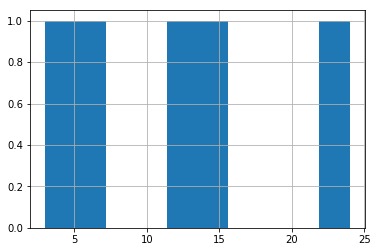

In [34]:
pd.Series(distances_between_indices_of_tweets_containing_keyword).hist()

# Construir un modelo

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta as beta_distribution

### Definir los parámetros de un Beta Distribution

In [36]:
alpha = 1 + number_of_occurences
beta = 1 + (NUMBER_OF_TWEETS - number_of_occurences)

x_values = np.linspace(0, 1, 1002)[1:-1]
pdf_y_values = beta_distribution(alpha, beta).pdf(x_values)
cdf_y_values = np.cumsum(pdf_y_values) / np.sum(pdf_y_values)

### Visualizar

![](http://i.imgur.com/mj059cS.png)

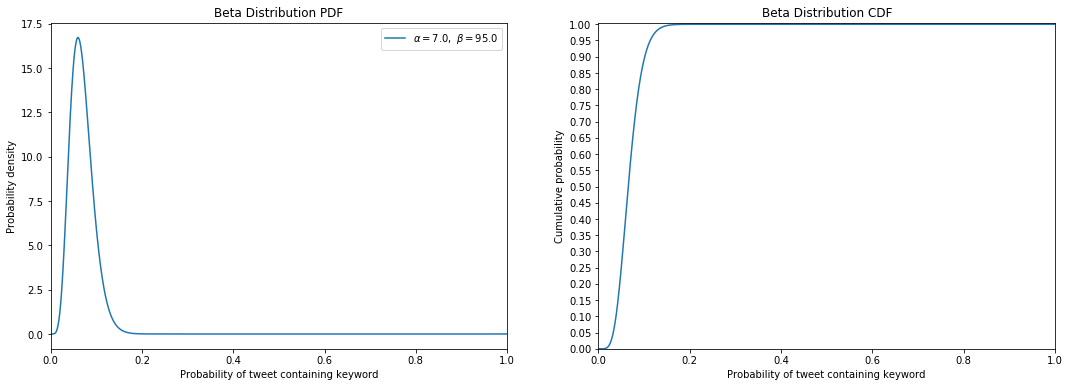

In [37]:
plt.figure(figsize=(18, 6))

# PDF
plt.subplot(121)

plt.plot(x_values, pdf_y_values, label=(r'$\alpha=%.1f,\ \beta=%.1f$' % (alpha, beta)))

plt.xlim(0, 1)
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Probability density')
plt.title('Beta Distribution PDF')
plt.legend(loc=1)


# CDF
plt.subplot(122)

plt.plot(x_values, cdf_y_values)

plt.xlim(0, 1)
plt.ylim(0, 1.005)
plt.yticks(np.linspace(0, 1, 21))
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Cumulative probability')
plt.title('Beta Distribution CDF')

plt.show()

# Comunicar resultados

### Con 90% de certeza, digamos que la verdadera probabilidad:

In [38]:
fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .05]
)

ninety_fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .95]
)

In [39]:
print('Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: {} y {}'.format(
    round(fifth_percentile, 4), round(ninety_fifth_percentile, 4)))

Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: 0.032 y 0.1129


### La probabilidad que la verdadera probabilidad (de que un tweet contiene nuesta palabra clave) sea más grande de .1:

In [40]:
def compute_total_probability_that_probability_less_than_p(p):
    return max(cumulative_prob for cumulative_prob, x_value in zip(cdf_y_values, x_values) if x_value < p)

In [41]:
print('La probabilidad que la verdadera probabilidad es > .1 es: {}'.format(
    1 - compute_total_probability_that_probability_less_than_p(.1))
)

La probabilidad que la verdadera probabilidad es > .1 es: 0.10880344340455528
